In [ ]:
# Location Words: Analysis of top 10 location words 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
all_data = pd.DataFrame()
for city in ['london', 'nyc', 'la']:
    file = '../../Data/data_'+city+'.csv'
    data = pd.read_csv(file)
    print(len(data))
    data = data[data['disadvantaged']==True]
    print(len(data))
    data = data[data['count_listings']>=5]
    print(len(data))
    print()
    
    if city=='london':
        data['nb'] = data['ward']
    else:
        data['nb'] = data['zipcode']
    # Percentile of Index 
    for p in ['index_change']:
        perc = []
        curr = data[pd.notna(data[p])]

        for i,r in data.iterrows():
            if pd.notna(r[p]):
                perc.append(stats.percentileofscore(curr[p], r[p]))
            else:
                perc.append(np.nan)
        data[p+'_perc'] = perc
    all_data = pd.concat([all_data, data])

454
230
186

185
83
79

130
68
58



In [3]:
all_data = all_data[['nb','index_change_perc']]

In [4]:
all_data.head()

,nb,index_change_perc
0,E05000381,84.946237
6,E05000263,97.849462
7,E05000635,63.440860
17,E05000142,68.817204
18,E05000648,9.677419


In [5]:
all_reviews = pd.DataFrame()
for city in ['london', 'nyc', 'la']:
    file = '../../Data/reviews/reviews_clean/reviews_clean_'+city+'.csv'
    data = pd.read_csv(file)
    print(len(data))
    all_reviews = pd.concat([all_reviews, data])

447979
1594522
942170


In [6]:
all_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,year,language,reviews_clean,rating,month,day
0,13913.0,4847959.0,2013-05-28,6405442.0,Vera,2013.0,en,happi alina guest great time london enjoy stay...,NaN,NaN,NaN
1,13913.0,8142329.0,2013-10-17,9195551.0,Honi,2013.0,en,stay alina flat london week wonder warm feel a...,NaN,NaN,NaN
2,13913.0,11876590.0,2014-04-17,5194009.0,Alessandro,2014.0,en,alina perfect guest flat absolut wonder high r...,NaN,NaN,NaN
3,13913.0,46669566.0,2015-09-12,42970248.0,Oleh,2015.0,en,alina flat except atmospher place flat plenti ...,NaN,NaN,NaN
4,13913.0,64559033.0,2016-03-05,45337884.0,Mo,2016.0,en,hous piec art beauti portrait close tube stati...,NaN,NaN,NaN


In [7]:
all_metadata = pd.DataFrame()
for city in ['london', 'nyc', 'la']:
    file = '../../Data/metadata/listings_'+city+'.csv'
    data = pd.read_csv(file)
    print(len(data))
    if city=='london':
        data['nb'] = data['ward']
    else:
        data['zipcode'] = data['zipcode'].astype('str')
        zipcode = []
        for i,r in data.iterrows():
            z = r['zipcode'][:5]
            if z.isnumeric():
                zipcode.append(z)
            else:
                zipcode.append(np.nan)
        data['zipcode'] = zipcode

        data = data[data['zipcode'].notna()]
        data['zipcode'] = pd.to_numeric(data['zipcode'], errors='coerce', downcast='integer')
        
        data['nb'] = data['zipcode']

    all_metadata = pd.concat([all_metadata, data])

86355
208749


/opt/anaconda3/envs/caispp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,7,8,9,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


75417


In [8]:
all_metadata = all_metadata[['listing_id','nb']]

In [9]:
all_metadata.head()

,listing_id,nb
0,13913.0,E05000381
1,15400.0,E05009405
2,17402.0,E05000641
3,17506.0,E05000264
4,25023.0,E05000628


In [10]:
all_reviews = pd.merge(all_reviews, all_metadata, on='listing_id', how='left')

In [11]:
all_reviews = all_reviews[pd.notna(all_reviews['nb'])]
len(all_reviews)

2963295

In [12]:
data = pd.merge(all_reviews, all_data, on='nb', how='left')

In [13]:
len(data)

2963295

In [14]:
data = data[pd.notna(data['index_change_perc'])]

In [15]:
data.head()

,listing_id,id,date,reviewer_id,reviewer_name,year,language,reviews_clean,rating,month,day,nb,index_change_perc
0,13913.0,4847959.0,2013-05-28,6405442.0,Vera,2013.0,en,happi alina guest great time london enjoy stay...,NaN,NaN,NaN,E05000381,84.946237
1,13913.0,8142329.0,2013-10-17,9195551.0,Honi,2013.0,en,stay alina flat london week wonder warm feel a...,NaN,NaN,NaN,E05000381,84.946237
2,13913.0,11876590.0,2014-04-17,5194009.0,Alessandro,2014.0,en,alina perfect guest flat absolut wonder high r...,NaN,NaN,NaN,E05000381,84.946237
3,13913.0,46669566.0,2015-09-12,42970248.0,Oleh,2015.0,en,alina flat except atmospher place flat plenti ...,NaN,NaN,NaN,E05000381,84.946237
4,13913.0,64559033.0,2016-03-05,45337884.0,Mo,2016.0,en,hous piec art beauti portrait close tube stati...,NaN,NaN,NaN,E05000381,84.946237


In [16]:
g = data[data['index_change_perc']>=75]
ng = data[data['index_change_perc']<=25]

In [17]:
len(g),len(ng)

(789510, 61782)

In [18]:
from tqdm import tqdm

In [19]:
def count(data): 
    
    counts = {}
    
    for i,r in tqdm(data.iterrows()):
        words = r['reviews_clean'].split()
        
        for w in words:
            if w not in counts.keys():
                counts[w] = 0
            counts[w] = counts[w] + 1
   
    return counts

In [20]:
g_counts = count(g)

789510it [01:51, 7050.93it/s]


In [21]:
ng_counts = count(ng)

61782it [00:08, 7485.48it/s]


In [22]:
new = {'word':[],'count':[]}
for k,v in g_counts.items():
    new['word'].append(k)
    new['count'].append(v)
g_words = pd.DataFrame.from_dict(new)

In [23]:
new = {'word':[],'count':[]}
for k,v in ng_counts.items():
    new['word'].append(k)
    new['count'].append(v)
ng_words = pd.DataFrame.from_dict(new)

In [24]:
g_words = g_words.sort_values(by=['count'],ascending=False).reset_index(drop=True)
ng_words = ng_words.sort_values(by=['count'],ascending=False).reset_index(drop=True)

In [25]:
len(g_words), len(ng_words)

(90710, 21931)

In [26]:
words = pd.read_csv('../data_processing/reviews/airbnb_words.csv')

In [27]:
location_words = list(words[words['cat_lev2']=='location']['word'].values)

In [28]:
from nltk.stem import SnowballStemmer
snowball=SnowballStemmer("english")

In [29]:
def stem(s):
    new = []
    for word in s.split():
        new.append(snowball.stem(word))
    return ' '.join(new)

In [30]:
location_words2 = []
for w in location_words:
    location_words2.append(stem(w))

In [31]:
location_words = location_words2

In [32]:
g_words['perc'] = g_words['count']/len(g)
ng_words['perc'] = ng_words['count']/len(ng)

In [33]:
g_words['perc']

0        0.691713
1        0.634098
2        0.600901
3        0.412197
4        0.364520
           ...   
90705    0.000001
90706    0.000001
90707    0.000001
90708    0.000001
90709    0.000001
Name: perc, Length: 90710, dtype: float64

In [34]:
ng_words['perc']

0        0.662183
1        0.533246
2        0.464164
3        0.362339
4        0.359846
           ...   
21926    0.000016
21927    0.000016
21928    0.000016
21929    0.000016
21930    0.000016
Name: perc, Length: 21931, dtype: float64

In [35]:
g_top = g_words[g_words['word'].isin(location_words)]
ng_top = ng_words[ng_words['word'].isin(location_words)]

In [36]:
g_top = g_top.rename(columns={'count':'g_count','perc':'g_perc'})
ng_top = ng_top.rename(columns={'count':'ng_count','perc':'ng_perc'})
top = pd.merge(g_top, ng_top, on='word', how='inner')

In [37]:
top = top.sort_values(by=['g_perc'], ascending=False)

In [38]:
from statsmodels.stats.proportion import proportions_ztest

In [39]:
top.head(10)

,word,g_count,g_perc,ng_count,ng_perc
0,place,474417,0.600901,32945,0.533246
1,locat,287678,0.364375,12316,0.199346
2,walk,141412,0.179114,8643,0.139895
3,close,133112,0.168601,8287,0.134133
4,subway,113898,0.144264,3163,0.051196
5,area,98153,0.124321,6437,0.104189
6,neighborhood,96559,0.122302,5577,0.090269
7,park,94830,0.120112,5292,0.085656
8,restaur,81068,0.102681,2538,0.041080
9,minut,76132,0.096429,6183,0.100078


In [40]:
pvals = []
g_ci = []
ng_ci = []

z = 1.96
for i,r in top.iterrows():
    stat, p = proportions_ztest([r['g_count'], r['ng_count']], [len(g), len(ng)])
    pvals.append(p)
    
    g_ci.append(z*np.sqrt((r['g_perc']*(1-r['g_perc']))/len(g)))
    ng_ci.append(z*np.sqrt((r['ng_perc']*(1-r['ng_perc']))/len(ng)))


top['p_val'] = pvals
top['g_ci'] = np.array(g_ci)*100
top['ng_ci'] = np.array(ng_ci)*100
top['g_perc'] = top['g_perc']*100
top['ng_perc'] = top['ng_perc']*100

In [41]:
top.head(10)

,word,g_count,g_perc,ng_count,ng_perc,p_val,g_ci,ng_ci
0,place,474417,60.090056,32945,53.324593,7.371297e-239,0.108024,0.393399
1,locat,287678,36.437537,12316,19.934609,0.000000e+00,0.106158,0.315030
2,walk,141412,17.911363,8643,13.989512,5.110142e-134,0.084583,0.273528
3,close,133112,16.860078,8287,13.413292,6.859518e-109,0.082587,0.268731
4,subway,113898,14.426416,3163,5.119614,0.000000e+00,0.077504,0.173793
5,area,98153,12.432141,6437,10.418892,8.651191e-49,0.072782,0.240904
6,neighborhood,96559,12.230244,5577,9.026901,4.031529e-123,0.072272,0.225970
7,park,94830,12.011247,5292,8.565602,1.423352e-144,0.071711,0.220678
8,restaur,81068,10.268141,2538,4.107993,0.000000e+00,0.066957,0.156506
9,minut,76132,9.642943,6183,10.007769,3.127973e-03,0.065112,0.236644


In [42]:
from matplotlib import pyplot as plt

In [43]:
groups = ['place', 'location', 'walk', 'close', 'subway', 'area', 'neighborhood', 'park', 'restaurant', 'minute']

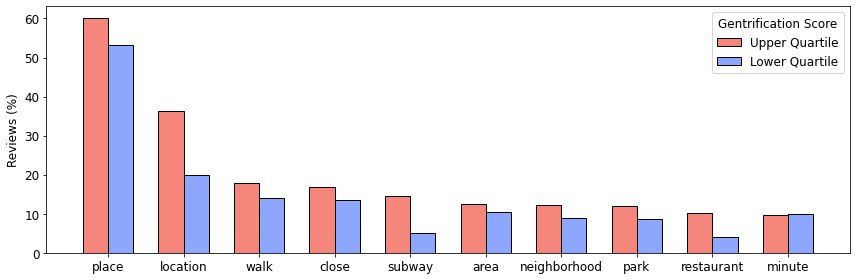

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [44]:
plt.rcParams["figure.figsize"] = [12,4]
fig, ax = plt.subplots()

g_perc = []
ng_perc = []
g_ci = []
ng_ci = []
for i,r in top.head(10).iterrows():
    g_perc.append(r['g_perc'])
    ng_perc.append(r['ng_perc'])
    g_ci.append(r['g_ci'])
    ng_ci.append(r['ng_ci'])

index = np.arange(len(groups))
bar_width = 1/3

# Plot Bars
ax.bar(index, g_perc, bar_width, edgecolor='k', color='#f4867b', label='Upper Quartile')
ax.bar(index+bar_width, ng_perc, bar_width, edgecolor='k', color='#8da7fe', label='Lower Quartile')

# Set Labels
ax.set_ylabel('Reviews (%)',fontsize=12)


# X-Axis Labels
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(groups,fontsize=12)

# Set Axis Limits
#ax.set_ylim(0, 100)
ax.set_yticklabels([0,10,20,30,40,50,60], fontsize=12)

legend = ax.legend(title='Gentrification Score', fontsize=12)
plt.setp(legend.get_title(),fontsize=12)

#plt.title('In-Sample Regression',fontsize=15)
# Helps Things Look Nice When Saving
fig.tight_layout()

# View Plot in Jupyter
plt.show()

# Save Figure (High Quality)
fig.savefig('word_frequencies.eps', format='eps', dpi=1000)